In [2]:
%run functions.ipynb

In [3]:
# Generate Input PSD
fmin = 1; fmax = 1000; bwp = 1; loc = 0;
#freq_spec = np.linspace(fmin,fmax,99901); psd_spec = np.zeros(99901); 

freq_spec = np.logspace(np.log10(fmin),np.log10(fmax),5000); psd_spec = np.zeros(5000);
for i in range(5000):
#for i in range(99901):
    psd_spec[i]= blwn(freq_spec[i],fmin,fmax,bwp,loc);
# Band Split
fi,pi = freq_spec,psd_spec;
dfi,dpi = band_split(fi,pi,2);

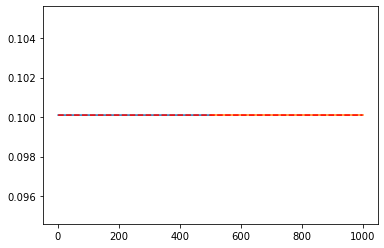

In [4]:
plt.plot(dfi[0],dpi[0]); plt.plot(dfi[1],dpi[1]);
plt.plot(freq_spec,psd_spec,'r--');

In [24]:
z = 0.05; mm = 4; dur = 10; model = 4; amp = 1;
# Caculate FDS 
fn,D  = FDS(fi    ,pi      ,zeta=z,m=mm,T=dur,C=1,model=model);
fn,D1 = FDS(dfi[0],dpi[0]*amp,zeta=z,m=mm,T=dur,C=1,model=model);
fn,D2 = FDS(dfi[1],dpi[1]*amp,zeta=z,m=mm,T=dur,C=1,model=model);

In [25]:
DD = D1+D2;
FR = D/DD;

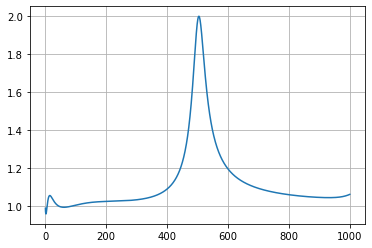

In [26]:
plt.plot(fn,FR);
#plt.xlim(0,120); plt.ylim(0.9,1.1);
plt.grid('on');

In [5]:
# Case 1) fn = 3
K = 1; fn = 3; zeta = 0.05; m = 4;
rpsd = pi*HH(fi,fn,zeta)*K;
D = D_dirlik(fi,rpsd,m=m,T=1,C=1);
rpsd1 = dpi[0]*HH(dfi[0],fn,zeta)*K;
D1 = D_dirlik(dfi[0],rpsd1,m=m,T=1,C=1);

print("D=%.4f, D1=%.4f"%(D,D1));
# Case 2) fn = 15
# Case 3) fn = 60
# Case 4) fn = 100

D=735.6515, D1=765.7301


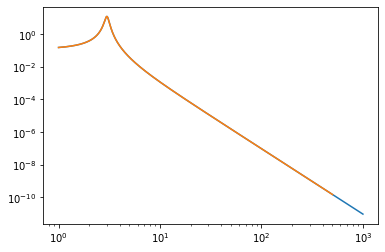

In [6]:
plt.loglog(fi,rpsd);
plt.loglog(dfi[0],rpsd1);

RPSD 넓이가 더 작은데, Damage는 더 크게 나온다?

Dirlik Model Rainflow Range PDF 검토

In [7]:
# Original PSD
freq = fi; psd = rpsd; m=4; T=10; C=1;
M0 = M(freq,psd,0);  M1 = M(freq,psd,1);  M2 = M(freq,psd,2);  M4 = M(freq,psd,4);
E0 = np.sqrt(M2/M0);
Ep = np.sqrt(M4/M2);
r = E0/Ep;    
Xm = (M1/M0)*np.sqrt(M2/M4);
Z = 1/np.sqrt(M0);
D1 = 2*(Xm-r**2)/(1+r**2);
R = (r-Xm-D1**2)/(1-r-D1+D1**2);
D2 = (1-r-D1+D1**2)/(1-R);
D3 = 1 - D1 - D2;
Q = 1.25*(r-D3-D2*R)/D1
def f(sa):
    A1 = D1/(np.sqrt(M0)*Q);
    A2 = D2*Z*sa/(np.sqrt(M0)*R**2);
    A3 = D3*Z*sa/np.sqrt(M0);
    a1 = -Z*sa/Q
    a2 = -(Z**2)*(sa**2)/(2*R**2);
    a3 = -(Z**2)*(sa**2)/2;
    return A1*np.exp(a1) + A2*np.exp(a2) + A3*np.exp(a3);
def z(m):
    mm = np.linspace(3,12,10);
    zz = np.array([8.652,8.822,8.982,9.133,9.277,9.415,9.546,9.673,9.796,9.915]);
    return np.interp(m,mm,zz);
LB = 0; UB = z(m)*np.sqrt(M0);
s = np.linspace(LB,UB,10000);
samfsa = (s**m)*f(s);
intsamfsa = np.trapz(samfsa,s);
D = Ep*T*intsamfsa/C;

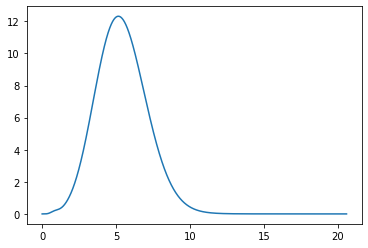

In [23]:
plt.plot(s,samfsa)

In [20]:
Ep

14.146060723517088

In [21]:
T

10

In [22]:
C

1

D=7356.51481400
A1=0.34265778
A2=3.39513906
A3=0.03605576
a1=-1.09564423
a2=-3.45932712
a3=-0.09172996


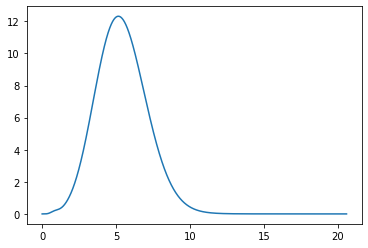

In [10]:
print("D=%.8f"%(D));
print("A1=%.8f"%(D1/(np.sqrt(M0)*Q)));
print("A2=%.8f"%(D2*Z/(np.sqrt(M0)*R**2)));
print("A3=%.8f"%(D3*Z/np.sqrt(M0)));
print("a1=%.8f"%(-Z/Q));
print("a2=%.8f"%(-(Z**2)/(2*R**2)));
print("a3=%.8f"%(-(Z**2)/2));
plt.plot(s,samfsa);

In [69]:
# Band1 PSD
freq = fi; psd = rpsd1; m=4; T=10; C=1;
M0 = M(freq,psd,0);  M1 = M(freq,psd,1);  M2 = M(freq,psd,2);  M4 = M(freq,psd,4);
E0 = np.sqrt(M2/M0);
Ep = np.sqrt(M4/M2);
r = E0/Ep;    
Xm = (M1/M0)*np.sqrt(M2/M4);
Z = 1/np.sqrt(M0);
D1 = 2*(Xm-r**2)/(1+r**2);
R = (r-Xm-D1**2)/(1-r-D1+D1**2);
D2 = (1-r-D1+D1**2)/(1-R);
D3 = 1 - D1 - D2;
Q = 1.25*(r-D3-D2*R)/D1
def f(sa):
    A1 = D1/(np.sqrt(M0)*Q);
    A2 = D2*Z*sa/(np.sqrt(M0)*R**2);
    A3 = D3*Z*sa/np.sqrt(M0);
    a1 = -Z*sa/Q
    a2 = -(Z**2)*(sa**2)/(2*R**2);
    a3 = -(Z**2)*(sa**2)/2;
    return A1*np.exp(a1) + A2*np.exp(a2) + A3*np.exp(a3);
def z(m):
    mm = np.linspace(3,12,10);
    zz = np.array([8.652,8.822,8.982,9.133,9.277,9.415,9.546,9.673,9.796,9.915]);
    return np.interp(m,mm,zz);
LB = 0; UB = z(m)*np.sqrt(M0);
s = np.linspace(LB,UB,10000);
samfsa = (s**m)*f(s);
intsamfsa = np.trapz(samfsa,s);
D = Ep*T*intsamfsa/C;

D=1960203.15306944
A1=0.08566445
A2=0.05477044
A3=0.00298985
a1=-0.23103761
a2=-0.07432215
a3=-0.00573312


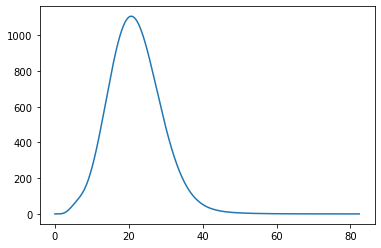

In [70]:
print("D=%.8f"%(D));
print("A1=%.8f"%(D1/(np.sqrt(M0)*Q)));
print("A2=%.8f"%(D2*Z/(np.sqrt(M0)*R**2)));
print("A3=%.8f"%(D3*Z/np.sqrt(M0)));
print("a1=%.8f"%(-Z/Q));
print("a2=%.8f"%(-(Z**2)/(2*R**2)));
print("a3=%.8f"%(-(Z**2)/2));
plt.plot(s,samfsa);

In [ ]:
D=1883267.79238442
A1=0.08566444
A2=0.21219619
A3=0.00225348
a1=-0.27391106
a2=-0.21620794
a3=-0.00573312

D=1960203.15306944
A1=0.08566445
A2=0.05477044
A3=0.00298985
a1=-0.23103761
a2=-0.07432215
a3=-0.00573312

시간영역 검토

In [60]:
fmin = 1; fmax = 1000; bwp = 1; loc = 0; z=0.05; mm=4; amp=1; ovl=0; dur=10;
# Generate Input PSD
freq_spec = np.logspace(np.log10(fmin),np.log10(fmax),5000); psd_spec = np.zeros(5000); 
for i in range(5000):
    psd_spec[i]= blwn(freq_spec[i],fmin,fmax,bwp,loc);
# Band Split
fi,pi = freq_spec,psd_spec;
dfi,dpi = band_split(fi,pi,2);
if ovl > 0:
    xlim1 = max(dfi[0])*0.9; xlim2 = min(dfi[1])*1.1;
    dfi,dpi = bs_overlap(dfi,dpi,ovl); # overlap
    
# Generate Time History
t1,th1, _, _ = psd2th_tom(fi,pi,dur);
t2,th2, _, _ = psd2th_tom(dfi[0],dpi[0],dur);
t3,th3, _, _ = psd2th_tom(dfi[1],dpi[1],dur);
# Calculate PSD of TH
f_syn1,p_syn1 = th2psd(t1,th1,2**12);
f_syn2,p_syn2 = th2psd(t2,th2,2**12);
f_syn3,p_syn3 = th2psd(t3,th3,2**12);
# Calculate FDS
f1,f2,oct,iom,irdu,bex = fmin,fmax,1./18.,2,1,4;
fn,D = th2fds_tom(t1,th1,f1,f2,oct,iom,irdu,bex)
fn,D1= th2fds_tom(t2,th2,f1,f2,oct,iom,irdu,bex)
fn,D2 = th2fds_tom(t3,th3,f1,f2,oct,iom,irdu,bex)

 
 Number of   Samples per   Time per        df    
 Segments     Segment      Segment(sec)   (Hz)   dof
       1 	   131072 	       6.55       0.153    2
       3 	    65536 	       3.28       0.305    6
       6 	    32768 	       1.64        0.61    12
      12 	    16384 	      0.819        1.22    24
      24 	     8192 	       0.41        2.44    48
      48 	     4096 	      0.205        4.88    96
      97 	     2048 	      0.102        9.77    194
     195 	     1024 	     0.0512        19.5    390
     390 	      512 	     0.0256        39.1    780
     781 	      256 	     0.0128        78.1    1562
    1562 	      128 	     0.0064         156    3124
 
     number of segments   NW= 24 
       samples/segments  mmm= 8192 
 half samples/segment-1   mH=4095  
 
        df= 2.441 Hz
 
 Number of   Samples per   Time per        df    
 Segments     Segment      Segment(sec)   (Hz)   dof
       1 	    65536 	       6.52       0.153    2
       3 	    32768 	       3.26       0.30

    812.7 	 0.002255 	 4.283e-09 
    844.7 	 0.002147 	 3.436e-09 
    877.8 	 0.001992 	 2.714e-09 
    912.3 	 0.001751 	  2.1e-09 
    948.1 	 0.001513 	 1.439e-09 
    985.3 	 0.001328 	 7.208e-10 
     1024 	 0.001015 	 2.222e-10 
        1 	    11.14 	 4.857e+04 
    1.039 	    13.91 	 1.047e+05 
     1.08 	    17.56 	 1.948e+05 
    1.122 	    19.81 	 3.085e+05 
    1.167 	    18.07 	 3.508e+05 
    1.212 	     16.8 	 2.727e+05 
     1.26 	    16.14 	 1.869e+05 
    1.309 	    15.53 	 1.134e+05 
    1.361 	     14.7 	 8.709e+04 
    1.414 	    14.85 	 1.094e+05 
     1.47 	    15.11 	 1.679e+05 
    1.527 	    13.61 	 1.472e+05 
    1.587 	    11.52 	 8.168e+04 
     1.65 	    10.91 	 4.233e+04 
    1.714 	    11.14 	 3.424e+04 
    1.782 	    10.92 	 3.638e+04 
    1.852 	    10.21 	 4.056e+04 
    1.924 	     9.84 	 3.801e+04 
        2 	    10.19 	 3.784e+04 
    2.079 	    10.56 	 3.292e+04 
     2.16 	    10.08 	 2.173e+04 
    2.245 	    9.351 	 1.837e+04 
    2.333 	    

     8.64 	 0.001284 	 2.87e-11 
     8.98 	 0.001248 	 2.86e-11 
    9.332 	  0.00122 	 2.845e-11 
    9.699 	 0.001197 	 2.792e-11 
    10.08 	 0.001172 	 2.734e-11 
    10.48 	 0.001145 	 2.669e-11 
    10.89 	 0.001117 	 2.66e-11 
    11.31 	  0.00109 	 2.646e-11 
    11.76 	 0.001064 	 2.617e-11 
    12.22 	 0.001036 	 2.586e-11 
     12.7 	 0.001007 	 2.554e-11 
     13.2 	 0.0009764 	 2.56e-11 
    13.72 	 0.0009443 	 2.558e-11 
    14.25 	 0.0009233 	 2.528e-11 
    14.81 	 0.0009014 	 2.523e-11 
     15.4 	 0.0008783 	 2.523e-11 
       16 	 0.0008541 	 2.506e-11 
    16.63 	 0.0008286 	 2.501e-11 
    17.28 	 0.0008019 	 2.497e-11 
    17.96 	 0.000774 	 2.489e-11 
    18.66 	 0.0007448 	 2.478e-11 
     19.4 	 0.0007145 	 2.472e-11 
    20.16 	 0.0007112 	 2.475e-11 
    20.95 	 0.0006999 	 2.477e-11 
    21.77 	 0.0006963 	 2.466e-11 
    22.63 	 0.0006415 	 2.458e-11 
    23.52 	 0.0006459 	 2.461e-11 
    24.44 	 0.0006486 	 2.463e-11 
     25.4 	 0.0006486 	 2.468e-11 
 

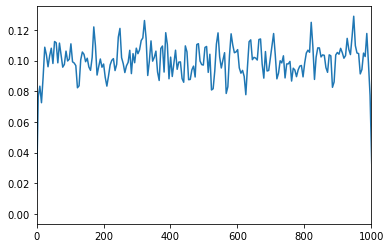

In [62]:
plt.plot(f_syn1,p_syn1);
plt.xlim(0,1000);

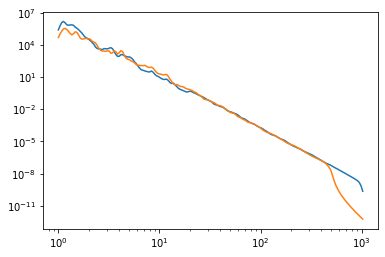

In [66]:
plt.loglog(fn,D);
plt.loglog(fn,D1);